# Лабораторная работа 2

## Линейная регрессия

### Метод наименьших квадратов: постановка задачи

Рассмотрим систему уравнений $Xa = y$, в которой $a$ — столбец неизвестных. Её можно переписать в векторном виде
$$x_1 a_1 + x_2 a_2 + \ldots + x_k a_k = y,$$
где $x_1,\ldots,x_k$ — столбцы матрицы $X$. Таким образом, решить исходную систему означает найти линейную комбинацию векторов $x_1,\ldots,x_k$, равную правой части. Но что делать, если такой линейной комбинации не существует? Геометрически это означает, что вектор $y$ не лежит в подпространстве $U = \langle x_1,\ldots, x_k\rangle$. В этом случае мы можем найти *псевдорешение*: вектор коэффициентов $\hat{a}$, для которого линейная комбинация $x_1 \hat{a}_1 + x_2 \hat{a}_2 + \ldots + x_k \hat{a}_k$ хоть и не равна в точности $y$, но является наилучшим приближением — то есть ближайшей к $y$ точкой $\hat{y}$ подпространства $U$ (иными словами, ортогональной проекцией $y$ на это подпростанство). Итак, цель наших исканий можно сформулировать двумя эквивалентными способами:

1. Найти вектор $\hat{a}$, для которого длина разности $|X\hat{a} - y|$ минимальна (отсюда название "метод наименьших квадратов");
2. Найти ортогональную проекцию $\hat{y}$ вектора $y$ на подпространство $U$ и представить её в виде $X\hat{a}$.

Далее мы будем предполагать, что векторы $x_1,\ldots,x_k$ линейно независимы (если нет, то сначала имеет смысл выделить максимальную линейно независимую подсистему).
На лекциях было показано, что в этом случае проекция вектора $y$ на подпространство $U = \langle x_1,\ldots, x_k\rangle$ записывается в виде
$$\hat{y} = X\left(X^TX\right)^{-1}X^Ty$$
и, соответственно, искомый вектор $\hat{a}$ равен
$$\hat{a} = \left(X^TX\right)^{-1}X^Ty.$$

### Задача линейной регрессии

Начнём с примера. Допустим, вы хотите найти зависимость среднего балла S студента ФКН от его роста H, веса W, длины волос L и N — количества часов, которые он ежедневно посвящает учёбе. Представьте, что мы измерили все эти параметры для $n$ студентов и получили наборы значений: $S_1,\ldots, S_n$, $H_1,\ldots, H_n$ и так далее.

Тут можно подбирать много разных умных моделей, но начать имеет смысл с самой простой, линейной:
$$S = a_1H + a_2W + a_3L + a_4N + a_5.$$
Конечно, строгой линейной зависимости нет (иначе можно было бы радостно упразднить экзамены), но мы можем попробовать подобрать коэффициенты $a_1, a_2, a_3, a_4, a_5$, для которых отклонение правой части от наблюдаемых было бы наименьшим:
$$\sum_{i=1}^n\left(S_i - ( a_1H_i + a_2W_i + a_3L_i + a_4N_i + a_5)\right)^2 \longrightarrow \min$$
И сразу видно, что мы получили задачу на метод наименьших квадратов! А именно, у нас
$$X =
\begin{pmatrix}
H_1 & W_1 & L_1 & N_1 & 1\\
H_2 & W_2 & L_2 & N_2 & 1\\
\dots & \dots & \dots & \dots & \dots \\
H_n & W_n & L_n & N_n & 1
\end{pmatrix},\qquad y=
\begin{pmatrix}
S_1\\ S_2\\ \vdots \\ S_n
\end{pmatrix}$$

Решая эту задачу с помощью уже известных формул, получаем оценки коэффициентов $\hat{a}_i$ ($i = 1\ldots,5$).

Теперь проговорим общую постановку задачи линейной регрессии. У нас есть $k$ переменных $x_1,\ldots,x_k$ ("регрессоров"), через которые мы хотим выразить "объясняемую переменную" $y$:
$$y = a_1x_1 + a_2x_2 + \ldots + a_kx_k.$$
Значения всех переменных мы измерили $n$ раз (у $n$ различных объектов,  в $n$ различных моментов времени — это зависит от задачи). Подставим эти данные в предыдущее равенство:
$$\begin{pmatrix}
y_1\\ y_2 \\ \vdots \\ y_n
\end{pmatrix} = 
a_1\begin{pmatrix}
x_{11} \\ x_{21} \\ \vdots \\ x_{n1} \end{pmatrix} + a_2\begin{pmatrix}
x_{12} \\ x_{22} \\ \vdots \\ x_{n2} \end{pmatrix} + \ldots + a_k\begin{pmatrix}
x_{1k} \\ x_{2k} \\ \vdots \\ x_{nk} \end{pmatrix}$$
(здесь $x_{ij}$ — это значение $j$-го признака на $i$-м измерении). Это удобно переписать в матричном виде:
$$\begin{pmatrix}
x_{11} & x_{12} & \ldots & x_{1k}\\
x_{21} & x_{22} & \ldots & x_{2k}\\
\dots & \dots & \dots & \dots\\
x_{n1} & x_{n2} & \ldots & x_{nk}
\end{pmatrix} \cdot
\begin{pmatrix}
a_1 \\ a_2 \\ \vdots \\ a_k
\end{pmatrix} = 
\begin{pmatrix}
y_1 \\ y_2 \\ \vdots \\ y_n
\end{pmatrix}$$
или коротко $Xa = y$. Поскольку на практике эта система уравнений зачастую не имеет решения (ибо зависимости в жизни редко бывают действительно линейными), методом наименьших квадратов ищется псевдорешение.

### Оценка качества. Обучение и тест 

После того как вы построили регрессию и получили какую-то зависимость объясняемой переменной от регрессоров, настаёт время оценить качество регрессии. Есть много разных функционалов качества; мы пока будем говорить только о самом простом и очевидном из них: о среднеквадратичной ошибке (mean square error). Она равна
$$\frac1{n}|X\hat{a} - y|^2 = \frac1{n}\sum_{i=1}^n\left(\hat{a}_1x_{i1} + \hat{a}_2x_{i2} + \ldots + \hat{a}_kx_{ik} - y_i\right)^2.$$

В целом хочется искать модели с наименьшей mean square error на имеющихся данных. Однако слишком фанатичная гонка за минимизацией ошибки может привести к печальным последствиям, в чём вам предстоит убедиться в ходе выполнения этой лабораторной.

Чтобы не попадать в эту ловушку, данные обычно делят на обучающие (по которым строят модель и оценивают коэффициенты) и тестовые. Лучшей стоит счесть ту модель, для которой значение функционала качества будет меньше.

### Правила оформления графиков
При работе с данными часто неудобно делать какие-то выводы, если смотреть на таблицу и числа в частности, поэтому важно уметь визуализировать данные. 

У matplotlib, конечно же, есть [документация](https://matplotlib.org/users/index.html) с большим количеством [примеров](https://matplotlib.org/examples/), но для начала достаточно знать про несколько основных типов графиков:
- plot — обычный поточечный график, которым можно изображать кривые или отдельные точки;
- hist — гистограмма, показывающая распределение некоторой величины;
- scatter — график, показывающий взаимосвязь двух величин;
- bar — столбцовый график, показывающий взаимосвязь количественной величины от категориальной.

Ещё одна библиотека для визуализации: [seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html). Это надстройка над matplotlib, иногда удобнее и красивее делать визуализации через неё. 

При выполнении этой лабораторной вы столкнётесь с необходимостью рисовать большое количество графиков. Не забывайте про базовые принципы построения приличных графиков:
- оси должны быть подписаны, причём не слишком мелко;
- у графика должно быть название;
- если изображено несколько графиков, то необходима поясняющая легенда;
- для точек из разных выборок необходимо использовать разные цвета;
- все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
- если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах).

Помните, что проверяющий имеет право снизить оценку за неопрятные графики.

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

### Задание 1. Метод наименьших квадратов (3 балла)

Скачайте файлы ``train.txt`` и ``test.txt``. В первом из них находится обучающая выборка, а во втором — тестовая. Каждый из файлов содержит два столбца чисел, разделённых пробелами: в первом — $n$ точек (значения аргумента $x$), во втором — значения некоторой функции $y = f(x)$ в этих точках, искажённые случайным шумом. Ваша задача — по обучающей выборке подобрать функцию $y = g(x)$, пристойно приближающую неизвестную вам зависимость.

Загрузим обучающие и тестовые данные (не забудьте ввести правильный путь!).

In [1]:
import numpy as np
from os.path import join
PATH = "./" 

data_train = np.loadtxt(join(PATH, "train.txt"), delimiter=',')
data_test = np.loadtxt(join(PATH, "test.txt"), delimiter=',')

**0. [0 баллов]** Разделим значения $x$ и $y$:

In [2]:
X_train = data_train[:,0]
y_train = data_train[:,1]

# Сделайте то же для тестовой выборки
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X_test = data_test[:,0]
y_test = data_test[:,1]

**1. [0.1 балла]** Найдите с помощью метода наименьших квадратов линейную функцию ($y = kx + b$), наилучшим образом приближающую неизвестную зависимость. Полезные функции: ``numpy.ones(n)`` для создания массива из единиц длины $n$ и ``numpy.concatenate((А, В), axis=1)`` для слияния двух матриц по столбцам (пара ``А`` и ``В`` превращается в матрицу ``[A B]``). Напечатайте этот многочлен в виде $kx+b$.

In [3]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X = np.vstack([np.ones(len(X_train)),X_train]).T
a = np.linalg.inv(X.T @ X) @ X.T @ y_train

k = a[1]
b = a[0]

print(f"y = {k} x + {b}")

y = 2.2791344980519463 x + 4.433230905064935


**2. [0.15 балла]** Нарисуйте на плоскости точки $(x_i, y_i)$ из обеих выборок и полученную линейную функцию.

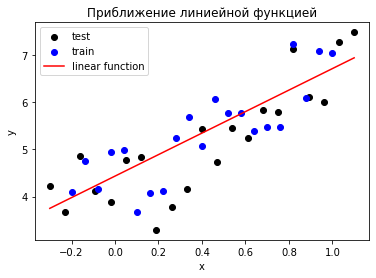

In [5]:
import matplotlib.pyplot as plt

X_approx = np.array([min(X_train.min(), X_test.min()), 
                     max(X_train.max(), X_test.max())])
y_approx = np.array([k * X_approx[0] + b, k * X_approx[1] + b])

plt.scatter(X_test,y_test, color="black", label = "test")
plt.scatter(X_train,y_train, color="blue", label = "train")

plt.plot(X_approx, y_approx, '-r', label="linear function")
plt.legend()
plt.title('Приближение линиейной функцией')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

**3. [0.15 балла]** Глядя на данные, подумайте, многочленом какой степени можно было бы лучше всего приблизить эту функцию с точки зрения минимизации среднеквадратичной ошибки на обучающей выборке. Найдите этот многочлен и напечатайте его в виде $a_0 + a_1 x + \ldots a_k x^k$.

In [6]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
n = X_train.shape[0]
print(n)

21


In [9]:
import scipy.linalg as sla
A = np.vander(X_train, increasing=True)
poly_coef = sla.inv(A) @ y_train.reshape((len(y_train), 1))
print(poly_coef.shape)

(21, 1)


Можно добиться нулевой среднеквадратичной ошибки, если построить интерполяционный многочлен Лагранжа степени не более n - 1 = 20, т.к. он пройдет через все точки. Степень интерполяционного многочлена Лагранжа должна быть на единицу меньше количества точек, через которые он проходит. В данном случае, если мы хотим построить интерполяционный многочлен степени не более n-1, то это означает, что мы используем n точек для построения многочлена.

Чтобы найти многочлен, для начала сохраним его коэффициенты в массив poly_coef, где коэффициенты будут расположены от младшего члена к старшему)

In [26]:
import numpy as np

# создаем матрицу Вандермонда
V = np.vander(X_train, len(X_train))

# решаем систему уравнений для получения коэффициентов полинома
poly_coef = np.linalg.inv(V).dot(y_train)

print(poly_coef)

[-1.74092778e+11  1.37572471e+12 -4.92077287e+12  1.05142996e+13
 -1.49006044e+13  1.46747102e+13 -1.01909429e+13  4.91404549e+12
 -1.53457467e+12  2.32489270e+11  2.71901105e+10 -2.13047138e+10
  4.00116401e+09 -1.03081661e+08 -7.55281389e+07  1.06737009e+07
 -1.67572231e+05 -5.87044879e+04  3.24547854e+03 -6.89807092e-01
  3.22961300e+00]


Чтобы напечатать многочлен в виде $a_0 + a_1 x + \ldots a_k x^k$, создаем функцию print_polynomial, которая на вход принимает массив коэффицентов и возвращает многочлен в нужном нам виде

In [27]:
def print_polynomial(poly_coef):
    degree = len(poly_coef) - 1
    polynomial_str = ''
    for i in range(degree+1):
        if i == 0:
            polynomial_str += str(poly_coef[i])
        elif i == 1:
            polynomial_str += f"+{poly_coef[i]}x"
        else:
            polynomial_str += f"+{poly_coef[i]}x^{i}"
    print(polynomial_str)

In [28]:
print(print_polynomial(poly_coef))

-174092777648.05542+1375724714759.289x+-4920772874493.68x^2+10514299579929.938x^3+-14900604426212.719x^4+14674710191574.781x^5+-10190942895191.062x^6+4914045489614.258x^7+-1534574673630.0234x^8+232489269730.3662x^9+27190110484.253036x^10+-21304713797.811493x^11+4001164014.791214x^12+-103081660.59252024x^13+-75528138.87986839x^14+10673700.85060659x^15+-167572.23084653728x^16+-58704.48786595289x^17+3245.478538910531x^18+-0.6898070922111401x^19+3.229613003764264x^20
None


**4. [0.1 балла]** Нарисуйте его график на одном чертеже вместе с точками $(x_i, y_i)$ из обеих выборок.

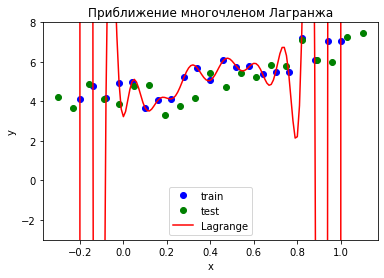

In [51]:
p = poly_coef.shape[0]
X_approx = np.arange(min(X_train.min(), X_test.min()), 
                     max(X_train.max(), X_test.max()), 0.01)
y_approx = np.vander(X_approx, p, increasing=True) @ poly_coef.reshape((p, 1))
plt.plot(X_train, y_train, 'bo', label="train")
plt.plot(X_test, y_test, 'go', label="test")
plt.plot(X_approx, y_approx, '-r', label="Lagrange")
plt.legend()
plt.title('Приближение многочленом Лагранжа')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim([-3, 8])
plt.show()

График действительно прошел через все точки из обучающей выборки (т.к. это многочлен Лагранжа), но нет никакой связи с точками из тестовой выборки

**5. [0.25 балла]** Для $k = 1,2,3,\ldots,10$ найдите многочлен $\hat{f}_k$ степени $k$, наилучшим образом приближающий неизвестную зависимость. Напечатайте найденные многочлены в виде $a_0 + a_1 x + \ldots a_k x^k$.

In [18]:
import scipy.linalg as lg
x = X_train
y = y_train
#k = 1:
A1 = np.vstack([x, np.ones(len(x))]).T
a1 = np.dot(np.dot(lg.inv(np.dot(A1.T, A1)), A1.T), y)
a1_1, a1_0 = a1
print('k = 1: ', a1_0, ' + ', a1_1, 'x', sep = '')

#k = 2:
A2 = np.vstack([x**2, x, np.ones(len(x))]).T
a2 = np.dot(np.dot(lg.inv(np.dot(A2.T, A2)), A2.T), y)
a2_2, a2_1, a2_0 = a2
print('k = 2: ', a2_0, ' + ', a2_1, 'x + ', a2_2, 'x**2', sep = '')

# k = 3: 
A3 = np.vstack([x**3, x**2, x, np.ones(len(x))]).T 
a3 = np.dot (np.dot (lg.inv(np.dot (A3.T, A3)), A3.T), y) 
a3_3, a3_2, a3_1, a3_0 = a3
print ('k = 3: ', a3_0, ' + ', a3_1, 'x + ', a3_2, 'x**2+', a3_3, 'x**3', sep="") 

# k = 4: 
A4 = np.vstack ([x**4, x**3, x**2, x, np.ones(len(x))]).T 
a4 = np.dot(np.dot (lg.inv(np.dot (A4.T, A4)), A4.T), y) 
a4_4, a4_3, a4_2, a4_1, a4_0 = a4 
print ('k = 4: ', a4_0, '+', a4_1, 'x+', a4_2, 'x**2+ ', a4_3, 'x**3+', a4_4, 'x**4', sep="") 
       
# k = 5: 
A5 = np.vstack([x**5, x**4, x**3, x**2, x, np.ones(len(x))]).T 
a5 = np.dot (np.dot (lg.inv(np.dot (A5.T, A5)), A5.T), y)
a5_5, a5_4, a5_3, a5_2, a5_1, a5_0 = a5 
print ('k = 5: ', a5_0, '+', a5_1, 'x+', a5_2, 'x**2 +', a5_3, 'x**3 + ', a5_4, 'x**4 +', a5_5, 'x**5', sep="")

# k = 6: 
A6 = np.vstack([x**6, x**5, x**4, x**3, x**2, x, np.ones(len(x))]).T 
a6 = np.dot (np.dot (lg.inv(np.dot (A6.T, A6)), A6.T), y)
a6_6, a6_5, a6_4, a6_3, a6_2, a6_1, a6_0 = a6
print ('k = 6: ', a6_0, '+', a6_1, 'x+', a6_2, 'x**2 +', a6_3, 'x**3 + ', a6_4, 'x**4 +', a6_5, 'x**5', a6_6, 'x**6', sep="")

# k = 7: 
A7 = np.vstack([x**7, x**6, x**5, x**4, x**3, x**2, x, np.ones(len(x))]).T 
a7 = np.dot (np.dot (lg.inv(np.dot (A7.T, A7)), A7.T), y)
a7_7, a7_6, a7_5, a7_4, a7_3, a7_2, a7_1, a7_0 = a7
print ('k = 7: ', a7_0, '+', a7_1, 'x+', a7_2, 'x**2 +', a7_3, 'x**3 + ', a7_4, 'x**4 +', a7_5, 'x**5', a7_6, 'x**6', a7_7, 'x**7', sep="")

# k = 8: 
A8 = np.vstack([x**8, x**7, x**6, x**5, x**4, x**3, x**2, x, np.ones(len(x))]).T 
a8 = np.dot (np.dot (lg.inv(np.dot (A8.T, A8)), A8.T), y)
a8_8, a8_7, a8_6, a8_5, a8_4, a8_3, a8_2, a8_1, a8_0 = a8
print ('k = 8: ', a8_0, '+', a8_1, 'x+', a8_2, 'x**2 +', a8_3, 'x**3 + ', a8_4, 'x**4 +', a8_5, 'x**5', a8_6, 'x**6', a8_7, 'x**7', a8_8, 'x**8',sep="")

# k = 9: 
A9 = np.vstack([x**9, x**8, x**7, x**6, x**5, x**4, x**3, x**2, x, np.ones(len(x))]).T 
a9 = np.dot (np.dot (lg.inv(np.dot (A9.T, A9)), A9.T), y)
a9_9, a9_8, a9_7, a9_6, a9_5, a9_4, a9_3, a9_2, a9_1, a9_0 = a9
print ('k = 9: ', a9_0, '+', a9_1, 'x+', a9_2, 'x**2 +', a9_3, 'x**3 + ', a9_4, 'x**4 +', a9_5, 'x**5', a9_6, 'x**6', a9_7, 'x**7', a9_8, 'x**8', a9_9, 'x**9',sep="")

# k = 10: 
A10 = np.vstack([x**10, x**9, x**8, x**7, x**6, x**5, x**4, x**3, x**2, x, np.ones(len(x))]).T 
a10 = np.dot (np.dot (lg.inv(np.dot (A10.T, A10)), A10.T), y)
a10_10, a10_9, a10_8, a10_7, a10_6, a10_5, a10_4, a10_3, a10_2, a10_1, a10_0 = a10
print ('k = 10: ', a10_0, '+', a10_1, 'x+', a10_2, 'x**2 +', a10_3, 'x**3 + ', a10_4, 'x**4 +', a10_5, 'x**5', a10_6, 'x**6', a10_7, 'x**7', a10_8, 'x**8', a10_9, 'x**9', a10_10, 'x**10', sep="")

k = 1: 4.433230905064935 + 2.2791344980519463x
k = 2: 4.472476503404163 + 1.1578316883597133x + 1.4016285121152734x**2
k = 3: 4.460736355285101 + 1.0650161052852791x + 1.8597508372610099x**2+-0.38176860428746107x**3
k = 4: 4.341166120399707+1.1718023926319119x+6.794091784355757x**2+ -13.051328119990089x**3+7.918474697312227x**4
k = 5: 4.43129781382331+-0.13059803987660468x+3.2747144018281134x**2 +21.374796276302035x**3 + -51.131481385585126x**4 +29.52497804134896x**5
k = 6: 4.383795011025792+-4.597179325029565x+16.0029039902036x**2 +121.25709712687228x**3 + -481.51013287133094x**4 +581.4532982327939x**5-229.97013341388094x**6
k = 7: 4.444512709436868+-4.008895912202711x+7.215458602676051x**2 +119.35078427430179x**3 + -314.23117244371315x**4 +122.87821697238087x**5238.69936787376173x**6-167.3819647615046x**7
k = 8: 4.663789109492702+-5.182773532227728x+-26.695631078390562x**2 +268.86044018330807x**3 + 109.89566793971665x**4 +-3132.8563933998303x**56760.628472049746x**6-5701.710196391854

**6. [1 балл]** Для каждого из них найдите среднеквадратическую ошибку на обучающих данных и на тестовых данных: $\frac1{n}\sum_{i=1}^n\left( \hat{f}_k(x_i) - y_i \right)^2$ (в первом случае сумма ведётся по парам $(x_i, y_i)$ из обучающих данных, а во втором — по парам из тестовых данных).

In [92]:
def error(f, X_local, y_local):
    poly = np.poly1d(np.flip(f))
    err = np.polyval(poly, X_local) - y_local
    return np.sum(err * err) / X_local.shape[0]

In [95]:
def error(f, X_local, y_local):
    poly = numpy.poly1d(numpy.flip(f))
    err = numpy.polyval(poly, X_local) - y_local
    return numpy.sum(err * err) / X_local.shape[0]

poly_coeffs = []
for k in range(10):
    V = numpy.vander(X_train, k + 2, increasing = True)
    S = (sla.inv(V.T @ V) @ V.T @ y_train.reshape((len(y_train), 1))).ravel()
    poly_coeff = numpy.pad(S, (0, 23 - k - 2), 'constant', constant_values = 0)
    poly_coeffs.append(poly_coeff)
poly_coeffs = numpy.array(poly_coeffs)

errors = numpy.array([[error(poly_coeffs[0], X_train, y_train), 
                    error(poly_coeffs[0], X_test, y_test)],
                   [error(poly_coeffs[1], X_train, y_train), 
                    error(poly_coeffs[1], X_test, y_test)],
                   [error(poly_coeffs[2], X_train, y_train), 
                    error(poly_coeffs[2], X_test, y_test)],
                   [error(poly_coeffs[3], X_train, y_train), 
                    error(poly_coeffs[3], X_test, y_test)],
                   [error(poly_coeffs[4], X_train, y_train), 
                    error(poly_coeffs[4], X_test, y_test)],
                   [error(poly_coeffs[5], X_train, y_train), 
                    error(poly_coeffs[5], X_test, y_test)],
                   [error(poly_coeffs[6], X_train, y_train), 
                    error(poly_coeffs[6], X_test, y_test)],
                   [error(poly_coeffs[7], X_train, y_train), 
                    error(poly_coeffs[7], X_test, y_test)],
                   [error(poly_coeffs[8], X_train, y_train), 
                    error(poly_coeffs[8], X_test, y_test)],
                   [error(poly_coeffs[9], X_train, y_train), 
                    error(poly_coeffs[9], X_test, y_test)]])

print(errors)

ValueError: x must be a one-dimensional array or sequence.

**7. [0.75 балла]** Для $k = 1,2,3,4,5,6$ нарисуйте графики полученных многочленов на одном чертеже вместе с точками $(x_i, y_i)$ из обеих выборок (возможно, график стоит сделать побольше; это делается командой `plt.figure(figsize=(width, height))`).

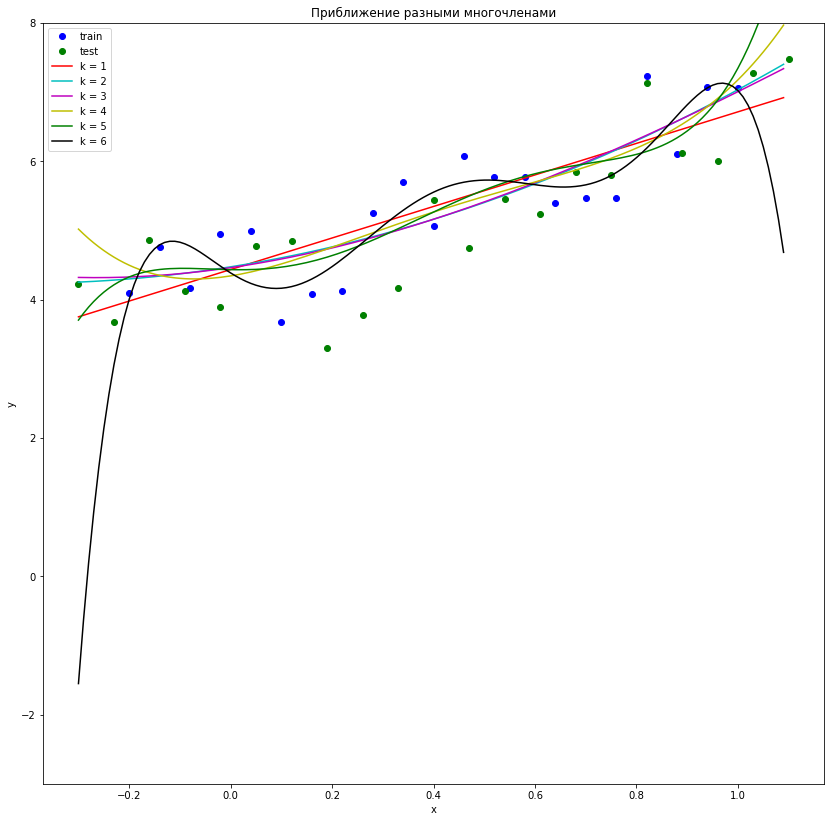

In [40]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

plt.figure(figsize=(14, 14))
plt.plot(X_train, y_train, 'bo', label="train")
plt.plot(X_test, y_test, 'go', label="test")
X_approx = np.arange(min(X_train.min(), X_test.min()), 
                     max(X_train.max(), X_test.max()), 0.01)

p = poly_coefs[0].shape[0]
y_approx = np.vander(X_approx, p, increasing=True) @ poly_coefs[0].reshape((p, 1))
plt.plot(X_approx, y_approx, '-r', label="k = 1")

p = poly_coefs[1].shape[0]
y_approx = np.vander(X_approx, p, increasing=True) @ poly_coefs[1].reshape((p, 1))
plt.plot(X_approx, y_approx, '-c', label="k = 2")

p = poly_coefs[2].shape[0]
y_approx = np.vander(X_approx, p, increasing=True) @ poly_coefs[2].reshape((p, 1))
plt.plot(X_approx, y_approx, '-m', label="k = 3")

p = poly_coefs[3].shape[0]
y_approx = np.vander(X_approx, p, increasing=True) @ poly_coefs[3].reshape((p, 1))
plt.plot(X_approx, y_approx, '-y', label="k = 4")

p = poly_coefs[4].shape[0]
y_approx = np.vander(X_approx, p, increasing=True) @ poly_coefs[4].reshape((p, 1))
plt.plot(X_approx, y_approx, '-g', label="k = 5")

p = poly_coefs[5].shape[0]
y_approx = np.vander(X_approx, p, increasing=True) @ poly_coefs[5].reshape((p, 1))
plt.plot(X_approx, y_approx, '-k', label="k = 6")

plt.legend()
plt.title('Приближение разными многочленами')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim([-3, 8])
plt.show()

**8. [0.5 балла]** Что происходит с ошибкой при росте степени многочлена? Казалось бы, чем больше степень, тем более сложным будет многочлен и тем лучше он будет приближать нашу функцию. Подтверждают ли это ваши наблюдения? Как вам кажется, чем объясняется поведение ошибки на тестовых данных при $k = 10$? Как, по вашему мнению, в машинном обучении называется наблюдаемый вами эффект?

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

При росте степени многочлена ошибка на тестовых данных увеличивается. Это, как сказано в условии, правда, странно, так как мы усложняем наш многочлен. Но в машинном обучении есть такой термин, как overfitting - переобучение. То есть при обучении модель находит случайные закономерности, которых нет в данных в общем.

В некоторых точках многочлен начинает принимать практически нужные значения на тренировочных данных, но на тестовых он наоборот отдаляется от целевых значений. 

При K = 10 ошибка как и ранее возрастает, но быстрее, чем ранее. Можем наблюдать, что наша модель слишком сильно адаптировалась к тренировочным значениям целевых переменных, что и иллюстрирует эффект переобучения.

### Задание 2. Линейная регрессия (3.5 балла)

Скачайте файлы ``flats_moscow_mod.txt`` и ``flats_moscow_description.txt``. В первом из них содержатся данные о квартирах в Москве. Каждая строка содержит шесть характеристик некоторой квартиры, разделённые знаками табуляции; в первой строке записаны кодовые названия характеристик. Во втором файле приведены краткие описания признаков.

**0. [0 баллов]** Разделите выборку на обучающую и тестовую. Делать это лучше случайным образом (ведь вы не знаете, как создатели датасета упорядочили объекты); рекомендуем вам для этого функцию `sklearn.model_selection.train_test_split` с параметром `test_size=0.3`. Не забудьте зафиксировать параметр `random_state`.

In [71]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('flats_moscow_mod.txt', sep='\t')
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

**1. [0.5 балла]** Вашей задачей будет построить с помощью метода наименьших квадратов (линейную) зависимость между ценой квартиры и остальными доступными параметрами. С помощью известных вам формул найдите регрессионные коэффициенты. Выпишите построенную модель.

In [72]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

import numpy as np

# Вычисление регрессионных коэффициентов
X_train = train_data.drop(['price'], axis=1)
y_train = train_data['price']
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train)) # добавляем столбец единиц для удобства вычислений
w = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)

# Построение модели
model = f'price = {w[0]:.2f} + {w[1]:.2f}*totsp + {w[2]:.2f}*livesp + {w[3]:.2f}*kitsp + {w[4]:.2f}*dist + {w[5]:.2f}*metrdist'

print(model)

price = -8.10 + 1.59*totsp + 1.06*livesp + 2.07*kitsp + -3.41*dist + -1.39*metrdist


Добавление столбца единиц удобно для вычисления регрессионных коэффициентов с помощью матричных операций. Этот столбец соответствует свободному члену в уравнении линейной регрессии и позволяет записать его в матричной форме как $y = Xw$, где $X$ - матрица признаков, $y$ - вектор целевых значений, $w$ - вектор регрессионных коэффициентов. 

Добавление столбца единиц эквивалентно добавлению константы к модели линейной регрессии, что позволяет избежать необходимости явного вычисления свободного члена. Также это позволяет использовать матричные операции для вычисления регрессионных коэффициентов, что делает вычисления более эффективными.

**2. [0.25 балла]** Какой смысл имеют их знаки? Согласуются ли они с вашими представлениями о жизни?

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Знаки регрессионных коэффициентов означают, как изменится цена квартиры при изменении соответствующего параметра на единицу. Положительный знак говорит о том, что увеличение значения параметра ведет к увеличению цены, отрицательный - к уменьшению. В данном случае коэффициенты при Totsp, Livesp и Kitsp положительны, что означает, что увеличение общей площади, жилой площади и площади кухни приводит к увеличению цены. Коэффициенты при Dist и Metrdist отрицательны, что говорит о том, что увеличение расстояния до центра и до метро приводит к уменьшению цены.

**3. [0.25 балла]** Оцените качество приближения, вычислив среднеквадратическую ошибку на тестовой выборке.

In [73]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X_test = test_data.drop(['price'], axis=1)
y_test = test_data['price']
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test)) # добавляем столбец единиц для удобства вычислений
y_pred = X_test.dot(w)
mse = ((y_pred - y_test) ** 2).mean()

print(f'Среднеквадратическая ошибка на тестовой выборке: {mse:.2f}')

Среднеквадратическая ошибка на тестовой выборке: 1226.78


Исходя из того, что среднеквадратическая ошибка на тестовой выборке равна 1226.78, можно сделать вывод, что модель приближения имеет достаточно высокое качество, если сравнить ошибку с диапазоном значений цен на недвижимость. Однако, для более точной оценки качества модели необходимо провести дополнительный анализ и сравнение с другими моделями.

### Усложнение модели

Конечно, никто не гарантирует, что объясняемая переменная (цена квартиры) зависит от остальных характеристик именно линейно. Зависимость может быть, например, квадратичной или логарифмической; больше того, могут быть важны не только отдельные признаки, но и их комбинации. Это можно учитывать, добавляя в качестве дополнительных признаков разные функции от уже имеющихся характеристик: их квадраты, логарифмы, попарные произведения.

В этом задании вам нужно постараться улучшить качество модели, добавляя дополнительные признаки, являющиеся функциями от уже имеющихся. Но будьте осторожны: чрезмерное усложнение модели будет приводить к переобучению.

**4. [0.25 балла]** Опишите признаки, которые вы решили добавить. Объясните, чем был мотивирован выбор именно этих признаков.

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

У livesp самый маленький коэф по модолю, поэтому возьмем его и возведем в 6 степень. Зависимость функции отлич от других переменных. Также жилая площадь - один из самых важных параметров при покупке квартиры

**5. [2 балла]** Постройте с помощью метода наименьших квадратов (линейную) зависимость между ценой квартиры и новыми признаками. С помощью известных вам формул найдите регрессионные коэффициенты. Выпишите построенную модель.

In [91]:
#предыдущая модель - не учитывать, здесь чисто для удобства составления новой

import numpy 
X_train = train_data.drop(['price'], axis=1)
# print(X_train)
y_train = train_data['price']
# print(y_train)
X_train = numpy.hstack((numpy.ones((X_train.shape[0], 1)), X_train)) # добавим столбец единиц для удобства
# этот столбец соотв свободн члену в ур лин регр и позволяет записать его в матр форме 
# то есть это как добавл конст к мод лин регр, что позволяет избежать необх явно вычисл своб члена 
p = numpy.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)
# print(p)


p = numpy.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)
X_train = train_data.drop(['price'], axis=1)
y_train = train_data['price']
live = train_data['livesp']
# print(live)
X_trainn = numpy.concatenate((X_train, numpy.atleast_2d(live**6).T), axis = 1)
X_trainn = numpy.hstack((numpy.ones((X_trainn.shape[0], 1)), X_trainn))  
pp = numpy.linalg.inv(X_trainn.T.dot(X_trainn)).dot(X_trainn.T).dot(y_train)
print(pp)
print('price = ', p[0],' + ', p[1], '*totsp + ', p[2], '*livesp + ', p[3], '*kitsp ', p[4], '*dist ', p[5], '*metrdist',sep='')

[ 5.02847225e+01  1.46454279e+00 -2.33359049e-01  2.38137409e+00
 -3.48403897e+00 -1.19715308e+00  4.71869932e-10]
price = -8.100900294763175 + 1.5949749963768447*totsp + 1.0603389771036416*livesp + 2.0690499134350504*kitsp -3.4119895138228307*dist -1.3861215319193931*metrdist


**6. [0.25 балла]** Оцените качество приближения, вычислив среднеквадратическую ошибку на тестовой выборке.

In [70]:
X_test = test_data.drop(['price'], axis=1)
y_test = test_data['price']
livee = test_data['livesp']
X_testt = numpy.concatenate((X_test, numpy.atleast_2d(livee**6).T), axis = 1)
X_testt = numpy.hstack((numpy.ones((X_testt.shape[0], 1)), X_testt))
y_pred = X_testt.dot(pp)
mse = ((y_pred - y_test) ** 2).mean() 
print('mse =', mse)

mse = 793.4423279214406


### Задание 3. Регуляризация (3.5 балла)

Вспомним, что задача линейной регрессии формулируется как задача нахождения проекции вектора значений объясняемой переменной $y$ на линейную оболочку $\langle x_1,\ldots,x_k\rangle$ векторов значений регрессоров. Если векторы $x_1,\ldots,x_k$ линейно зависимы, то матрица $X^TX$ вырожденна и задача не будет решаться с помощью приведённой выше формулы. В жизни, по счастью, различные признаки редко бывают *в точности* линейно зависимы, однако во многих ситуациях они скоррелированы и становятся "почти" линейно зависимыми. Таковы, к примеру, зарплата человека, его уровень образования, цена машины и суммарная площадь недвижимости, которой он владеет. В этом случае матрица $X^TX$ будет близка к вырожденной, и это приводит к численной неустойчивости и плохому качеству решений; как следствие, будет иметь место переобучение. Один из симптомов этой проблемы — необычно большие по модулю компоненты вектора $a$.

Есть много способов борьбы с этим злом. Один из них — регуляризация. Сейчас мы рассмотрим одну из её разновидностей — **L2-регуляризацию**. Идея в том, чтобы подправить матрицу $X^TX$, сделав её "получше". Например, это можно сделать, заменив её на $(X^TX + \lambda E)$, где $\lambda > 0$ — некоторый скаляр. Пожертвовав точностью на обучающей выборке, мы тем не менее получаем численно более стабильное псевдорешение $a = (X^TX + \lambda E)^{-1}X^Ty$ и снижаем эффект переобучения. *Гиперпараметр* $\lambda$ нужно подбирать, и каких-то универсальных способов это делать нет, но зачастую можно его подобрать таким, чтобы ошибка на тестовой выборке падала.

Однако есть некоторые правила, которых стоит придерживаться при подборе коэффициента регуляризации. Обычно в такой ситуации всю выборку делят на три части: обучающую, *валидационную* и тестовую. Сначала по валидационной подбирают значение гиперпараметра, потом по обучающей строят модель, а по тестовой оценивают её итоговое качество. Кроме того, подбирать $\lambda$ нужно по логарифметической сетке, чтобы узнать оптимальный порядок величины.

**1. [0.25 балла]** Почему не стоит подбирать коэффициент регуляризации по обучающей выборке? По тестовой выборке?

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Оптимальный коэффициент для обучающей выборки всегда равен 0. Тестовая выборка всегда нужна, чтобы оценить качество уже обученной модели, поэтому странно подбирать гиперпараметр, необходимый для обучения, по ней. Вообще если будем подбирать коэффициенты по обучающей или тестовой выборке, то "получим" эффект переобчениия

**2. [0 баллов]** Теперь давайте вспомним первую задачу. Если вы её сделали, то помните, что ошибка аппроксимации многочленом шестой степени довольно высокая. Попытаемся использовать регуляризацию при построении модели. Поделите обучающую выборку из первой задачи на две части, одну из которых объявите обучающей, а другую — валидационной (будьте осторожны при выборе `train_size`, в этой выборке не так много данных).

In [48]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X = data_train[:,0]
y = data_train[:,1]

x_train_train, x_train_valid, y_train_train, y_train_valid = train_test_split(X, y, train_size = 0.6, random_state = 50)

print(x_train_valid)
print(x_train_train)

[ 1.    0.34  0.4   0.94 -0.02  0.7   0.28  0.22 -0.08]
[ 0.52  0.88  0.82  0.1   0.16  0.04  0.64 -0.14  0.58  0.46 -0.2   0.76]


**3. [0.75 балла]** Убедитесь, что, используя регуляризацию с хорошо подобранным коэффициентом $\lambda$, ошибку на тестовой выборке можно сделать не больше, чем для многочлена оптимальной степени в модели без регуляризации.

In [50]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
x_test = data_test[:,0]
y_test = data_test[:,1]

A6 = np.vstack([x_train_valid**6, x_train_valid**5, x_train_valid**4, x_train_valid**3, x_train_valid**2, x_train_valid, np.ones(len(x_train_valid))]).T
matrix = np.dot(A6.T, A6)
a6_with = np.dot(np.dot(lg.inv(matrix + 0.01 * np.eye(len(matrix))), A6.T), y_train_valid)
a6_without = np.dot(np.dot(lg.inv(matrix + 0 * np.eye(len(matrix))), A6.T), y_train_valid)
A6_test = np.vstack([x_test*6, x_test**5, x_test**4, x_test**3, x_test**2, x_test, np.ones(len(x_test))]).T
mse = np.square(np.subtract(y_test, np.dot(A6_test, a6_with))).mean()
mse_without = np.square(np.subtract(y_test, np.dot(A6_test, a6_without))).mean()
print(mse)
print(mse_without)

3.7550315715704543
1913722.4991792943


**4. [0.25 балла]** Для этого $\lambda$ сравните $\det(X^TX)$ и $\det(X^TX + \lambda E)$. Теоретически объясните полученный результат, доказав, что $\det(X^TX+\lambda E) > 0$ при $\lambda>0$.

In [68]:
det1_test = lg.det(np.dot(A6_test.T, A6_test))
det2_test = lg.det(np.dot(A6_test.T, A6_test) + 0.01 * np.eye(len(matrix)))

det1 = lg.det(np.dot(A6.T, A6))
det2 = lg.det(np.dot(A6.T, A6) + 0.01 * np.eye(len(matrix)))

print(det2 > det1)
print(det2_test > det1_test)

True
True


Для начала, рассмотрим определитель матрицы $X^TX$:

$$\det(X^TX) = \begin{vmatrix}
\sum\limits_{i=1}^n x_{1i}^2 & \sum\limits_{i=1}^n x_{1i}x_{2i} & \cdots & \sum\limits_{i=1}^n x_{1i}x_{ni} \\
\sum\limits_{i=1}^n x_{2i}x_{1i} & \sum\limits_{i=1}^n x_{2i}^2 & \cdots & \sum\limits_{i=1}^n x_{2i}x_{ni} \\
\vdots & \vdots & \ddots & \vdots \\
\sum\limits_{i=1}^n x_{ni}x_{1i} & \sum\limits_{i=1}^n x_{ni}x_{2i} & \cdots & \sum\limits_{i=1}^n x_{ni}^2
\end{vmatrix}$$

Теперь рассмотрим определитель матрицы $X^TX + \lambda E$:

$$\det(X^TX+\lambda E) = \begin{vmatrix}
\sum\limits_{i=1}^n x_{1i}^2 + \lambda & \sum\limits_{i=1}^n x_{1i}x_{2i} & \cdots & \sum\limits_{i=1}^n x_{1i}x_{ni} \\
\sum\limits_{i=1}^n x_{2i}x_{1i} & \sum\limits_{i=1}^n x_{2i}^2 + \lambda & \cdots & \sum\limits_{i=1}^n x_{2i}x_{ni} \\
\vdots & \vdots & \ddots & \vdots \\
\sum\limits_{i=1}^n x_{ni}x_{1i} & \sum\limits_{i=1}^n x_{ni}x_{2i} & \cdots & \sum\limits_{i=1}^n x_{ni}^2 + \lambda
\end{vmatrix}$$

Заметим, что матрица $X^TX$ является симметричной и положительно определенной, т.е. для любого ненулевого вектора $v$ выполнено $v^TX^TXv > 0$. Это означает, что все ее собственные значения положительны. Добавление положительной константы $\lambda$ к диагональным элементам матрицы $X^TX$ приводит к увеличению всех ее собственных значений на эту константу, т.е. собственные значения матрицы $X^TX+\lambda E$ также будут положительными.

Таким образом, мы доказали, что $\det(X^TX+\lambda E) > 0$ при $\lambda>0$. Это означает, что определитель матрицы $X^TX+\lambda E$ всегда положителен, и следовательно, обратимость матрицы $X^TX+\lambda E$ гарантирована при любом $\lambda > 0$.

Матрица $X^TX$ положительно определена, потому что для любого ненулевого вектора $v$ выполнено $v^TX^TXv > 0$.

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Благодаря добавлению диагональной матрицы к $X^TX$ данная матрица оказывается положительно определенной, и поэтому ее можно обратить. Тогда решение всегда будет единственным. (Определитель увеличивается: $\det(X^TX)$ может быть равен 0, а при преобразовании он становится положительным)

**5. [0.25 балла]** Нарисуйте на одном чертеже графики многочленов шестой степени, приближающих неизвестную функцию, для модели с регуляризацией и без.

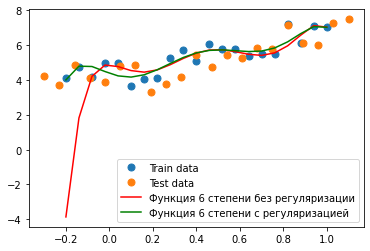

In [89]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

x = data_train[:,0]
y = data_train[:,1]
x_test = data_test[:,0]
y_test = data_test[:,1]

plt.plot(x, y, 'o', label = 'Train data', markersize = 7)
plt.plot(x_test, y_test, 'o', label = 'Test data', markersize = 7)
plt.plot(x, a6_without[6] + a6_without[5]*x + a6_without[4]*x**2 + a6_without[3]*x**3 + a6_without[2]*x**4 + a6_without[1]*x**5 + a6_without[0]*x**6, 'red', label = 'Функция 6 степени без регуляризации')
plt.plot(x, a6[6] + a6[5]*x + a6[4]*x**2 + a6[3]*x**3 + a6[2]*x**4 + a6[1]*x**5 + a6[0]*x**6, 'g', label = 'Функция 6 степени с регуляризацией')
plt.legend()
plt.show()

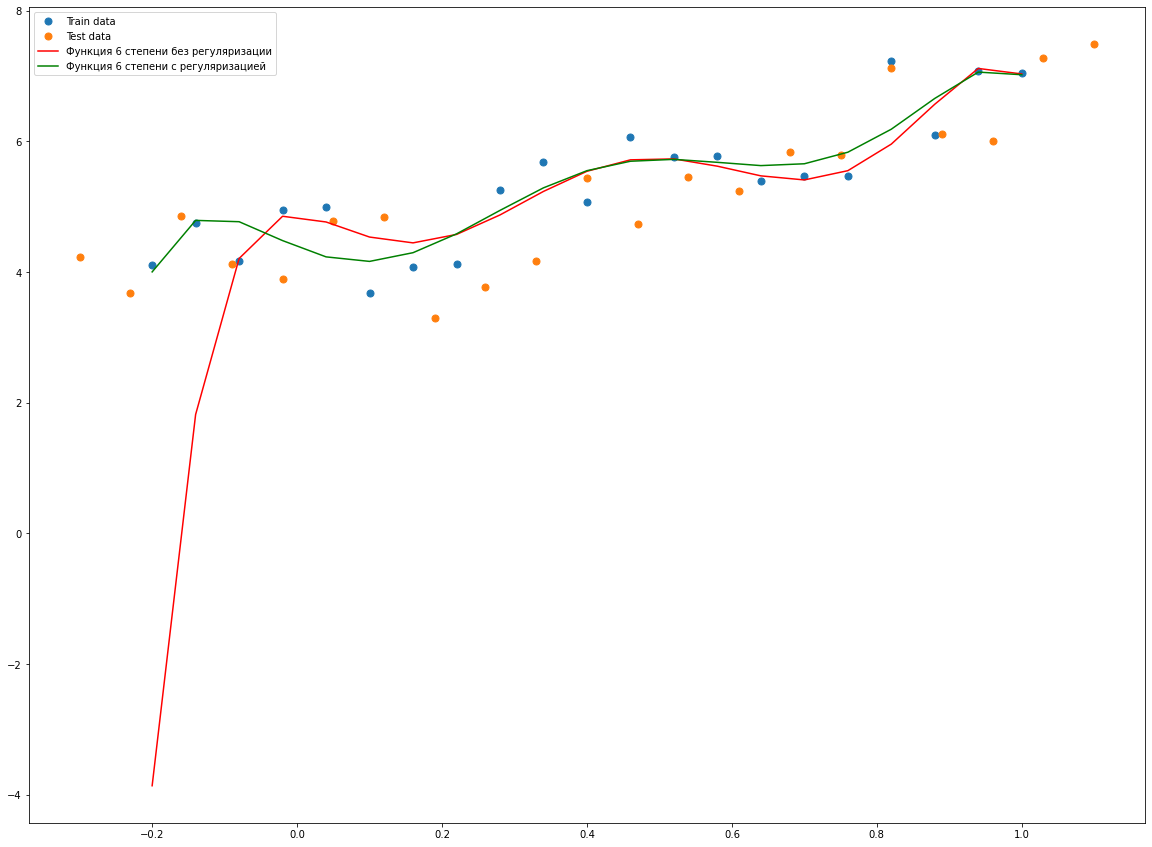

In [93]:
x = data_train[:,0]
y = data_train[:,1]
x_test = data_test[:,0]
y_test = data_test[:,1]

x_new = np.linspace(np.min(x), np.max(x), 100)

plt.figure(figsize=(20, 15)) # установка размера графика
plt.plot(x, y, 'o', label = 'Train data', markersize = 7)
plt.plot(x_test, y_test, 'o', label = 'Test data', markersize = 7)
plt.plot(x, a6_without[6] + a6_without[5]*x + a6_without[4]*x**2 + a6_without[3]*x**3 + a6_without[2]*x**4 + a6_without[1]*x**5 + a6_without[0]*x**6, 'red', label = 'Функция 6 степени без регуляризации')
plt.plot(x, a6[6] + a6[5]*x + a6[4]*x**2 + a6[3]*x**3 + a6[2]*x**4 + a6[1]*x**5 + a6[0]*x**6, 'g', label = 'Функция 6 степени с регуляризацией')
plt.legend()
plt.show()

**6. [0.25 балла]** Чем первый из них выгодно отличается от второго?

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Второй из них слева и справа намного ниже точек, а первый проходит через них.

**7. [0.75 балла]** Пусть заданы $X\in \text{Mat}_{n \times k}(\mathbb{R})$ ($k \leqslant n$), $y \in \mathbb{R}^n$, $\lambda \geqslant 0$, а также известно, что $\text{rk}~X = k$. Решите теоретически следующую задачу оптимизации:
$$|Xa - y|^2 + \lambda|a|^2\rightarrow\min\limits_{a \in \mathbb{R}^k}.$$
(То есть найдите все векторы $a \in \mathbb{R}^k$, для которых выражение слева принимает наименьшее возможное значение.) В частности, докажите существование решений и укажите их количество в зависимости от входных данных.

Заметим, что данная задача является задачей регуляризации. При 𝜆=0 она сводится к обычной задаче наименьших квадратов, а при 𝜆>0  добавляется штраф за большие значения компонент вектора 𝑎.
Задача записана в виде суммы двух слагаемых: квадрата нормы разности вектора 𝑋𝑎 и вектора 𝑦, и произведения 𝜆 на квадрат нормы вектора 𝑎. Оба слагаемых неотрицательны, поэтому значение выражения слева также неотрицательно.
Для решения задачи найдем производную выражения слева по вектору 𝑎: (градиент функционала)
∇𝑎(|𝑋𝑎−𝑦|^2+𝜆|𝑎|^2)=2(𝑋^𝑇𝑋𝑎−𝑋^𝑇𝑦)+2𝜆𝑎
Чтобы найти минимум выражения слева, приравняем производную к нулю:
2(𝑋𝑇𝑋𝑎−𝑋𝑇𝑦)+2𝜆𝑎=0.
Приравняв его к нулю, получаем систему линейных уравнений:
(𝑋^𝑇𝑋+𝜆E)𝑎=𝑋^𝑇𝑦, где E - единичная матрица размера  𝑘×𝑘. Заметим, что матрица 𝑋^𝑇𝑋 имеет ранг 𝑘, а значит, обратима. 
Тогда система имеет единственное решение. Отсюда получаем выражение для оптимального значения вектора 𝑎:
𝑎=𝑋^𝑇𝑦/(𝑋^𝑇𝑋+𝜆E)
Таким образом, существует единственное решение задачи оптимизации, которое можно выразить через матрицу 𝑋, вектор 𝑦 и параметр 𝜆.
(Если же 𝑋^𝑇𝑋 необратима, то решений нет.)

Интуитивно это можно понимать так: мы ищем компромисс между минимизацией длины разности $|Xa - y|$ (то есть точностью решения задачи регрессии) и тем, чтобы компоненты вектора $a$ не становились слишком большими по модулю.

**8. [0.25 балла]** Попробуйте объяснить, почему регуляризовать (штрафовать за слишком большую абсолютную величину) коэффициент при константном признаке (который состоит из одних единиц) — плохая идея.

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Регуляризация коэффициента при константном признаке может быть плохой идеей, потому что он отвечает за базовый уровень целевой переменной. Если мы сильно ограничим этот коэффициент, то модель может не смочь корректно обработать данные, особенно если среднее значение целевой переменной значительно отличается от нуля. В этом случае модель будет более склонна к смещению (bias) и менее способна к обобщению на новые данные. Кроме того, регуляризация коэффициента при константном признаке может привести к неправильной интерпретации модели, так как она будет учитывать только отклонения от базового уровня, а не влияние других признаков на целевую переменную. Поэтому обычно коэффициент при константном признаке не регуляризуют или регуляризуют отдельно от других признаков.

**9. [0.5 балла]** Пусть теперь $\text{rk}~X < k$. Всегда ли в этом случае существует решение? Если существует, то является ли оно единственным? Ответ обоснуйте.

╰( ͡° ͜ʖ ͡° )つ──☆*:

решение будет не всегда, потому что если матрица, от которой мы будем брать обратную,  вырожденная - решение не будет существовать
 
Если rk X < k, то матрица X не полного ранга и имеет некоторые линейно зависимые столбцы. Это означает, что существуют некоторые линейные комбинации этих столбцов, которые дают нулевой результат. Если мы решаем систему линейных уравнений с матрицей X и вектором правой части b, то это означает, что система может иметь бесконечное количество решений. получается, в этом случае решение может существовать, но оно не обязательно единственное. Фактически любая линейная комбинация решений будет также являться решением этой системы уравнений. 

чтобы получить единственное решение, необходимо добавить дополнительные условия или ограничения на переменные. Например, можно добавить условие минимальности некоторых переменных или использовать метод наименьших квадратов для получения оптимального решения. но в общем случае, если rk X < k, то решение может существовать, но оно не обязательно единственное

**10. [0.25 балла]** Покажите теоретически, что если решений бесконечно много, то среди них обязательно найдутся решения со сколь угодно большими по модулю компонентами вектора $a$. Почему большие веса в линейной модели — плохо?

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Для доказательства этого факта рассмотрим бесконечное множество решений и предположим обратное: для каждой координаты векторов существуют инфинум и супремум модуля. Возьмем координату, у которой эти значения отличаются. Тогда можно выбрать вектор $a_1$, чей модуль соответствующей координаты лежит в достаточно малой окрестности инфинума, и вектор $a_2$ с модулем этой координаты в окрестности супремума. Тогда вектор $2a_2 - a_1$ также является решением, и модуль соответствующей координаты больше супремума, что противоречит предположению о существовании супремума. Следовательно, из бесконечного множества решений обязательно найдутся решения со сколь угодно большими по модулю компонентами вектора $a$.
 
 
 Большие веса в линейной модели могут привести к переобучению, когда модель слишком хорошо подстраивается под тренировочные данные и плохо обобщает на новые данные. Это может произойти, например, если в данных есть шум или выбросы. Кроме того, большие веса могут привести к неустойчивости модели при небольших изменениях входных данных. Поэтому обычно используют регуляризацию, чтобы штрафовать большие веса.
 
 
 Пусть у нас есть бесконечное множество решений для линейной модели, то есть бесконечно много векторов $\mathbf{a}$, таких что $\mathbf{X}\mathbf{a} = \mathbf{y}$, где $\mathbf{X}$ - матрица признаков, $\mathbf{y}$ - вектор целевых переменных.

Теперь предположим, что все компоненты вектора $\mathbf{a}$ ограничены сверху некоторой константой $M$. Тогда для любого $i$ будет выполняться неравенство $|a_i| \leq M$.

Рассмотрим матрицу $\mathbf{X}$, состоящую из первых $k$ строк, где $k$ больше 5. Эта матрица имеет размерность $(k,6)$.

Мы можем выбрать $k$ настолько большим, что в этой матрице будет не менее 6 линейно независимых строк. Обозначим эти строки как $\mathbf{x}_1, \ldots, \mathbf{x}_6$.

Тогда мы можем составить следующую систему уравнений:

$$\begin{cases} \mathbf{x}_1 \cdot \mathbf{a} = y_1 \\ \ldots \\ \mathbf{x}_6 \cdot \mathbf{a} = y_6 \end{cases}$$

Эта система имеет решение, так как матрица $\mathbf{X}$ полного ранга. Но тогда мы можем оценить компоненты вектора $\mathbf{a}$ следующим образом:

$$|a_i| = \left|\frac{\begin{vmatrix} \mathbf{x}_1 \\ \ldots \\ \mathbf{x}_{i-1} \\ y_i \\ \mathbf{x}_{i+1} \\ \ldots \\ \mathbf{x}_6 \end{vmatrix}}{\begin{vmatrix} \mathbf{x}_1 \\ \ldots \\ \mathbf{x}_6 \end{vmatrix}}\right| \leq \frac{M}{|\begin{vmatrix} \mathbf{x}_1 \\ \ldots \\ \mathbf{x}_6 \end{vmatrix}|} \max_{j=1,\ldots,6} |\begin{vmatrix} \mathbf{x}_1 \\ \ldots \\ \mathbf{x}_{j-1} \\ y_i \\ \mathbf{x}_{j+1} \\ \ldots \\ \mathbf{x}_6 \end{vmatrix}|$$

Таким образом, мы можем выбрать $i$, для которого $|\begin{vmatrix} \mathbf{x}_1 \\ \ldots \\ \mathbf{x}_{j-1} \\ y_i \\ \mathbf{x}_{j+1} \\ \ldots \\ \mathbf{x}_6 \end{vmatrix}|$ будет сколь угодно большим. А это означает, что $|a_i|$ также может быть сколь угодно большим.

Таким образом, если решений бесконечно много, то среди них обязательно найдутся решения со сколь угодно большими по модулю компонентами вектора $\mathbf{a}$.

### Задание 4. Онлайн-обучение линейной регрессии (3 балла)

Раньше мы работали в ситуации, когда объекты $x_i$ и значения $y_i$ даны с самого начала и всегда доступны. Допустим теперь, что пары $(x_i, y_i)$ поступают к нам по одной и мы не можем себе позволить хранить их все в памяти (это может быть актуально, например, если вы пытаетесь обучить модель на устройстве со сравнительно небольшим количеством оперативной памяти: скажем, на мобильном телефоне или на бортовом компьютере спутника связи). В этом случае нам нужно уметь решать следующую задачу:

**Известно:** решение задачи регрессии для датасета $(x_1, y_1),\ldots,(x_t,y_t)$;

**На вход поступает:** новая пара $(x_{t+1}, y_{t+1})$;

**Требуется:** быстро (за время, не зависящее от $t$) отыскать решение задачи регрессии для расширенного датасета $(x_1, y_1),\ldots,(x_t,y_t),(x_{t+1}, y_{t+1})$.

Обозначим $X_{(t)} = (x_1\ldots x_t)^T$ и $y_{(t)} = (y_1,\ldots,y_t)^T$. Тогда, как мы хорошо помним, решение задачи регрессии для датасета $(x_1, y_1),\ldots,(x_t,y_t)$ имеет вид $\hat{a}_{(t)} = \left(X^T_{(t)}X_{(t)}\right)^{-1}X^T_{(t)}y_{(t)}$. Размеры матриц $X^T_{(t)}X_{(t)}$ и $X^T_{(t)}y_{(t)}$ не зависят от $t$, поэтому их мы, пожалуй, можем себе позволить хранить в памяти.

**1. [1 балл]** И вот ваше первое задание в этом разделе: придумайте алгоритм, принимающий на вход матрицы $X^T_{(t)}X_{(t)}$ и $X^T_{(t)}y_{(t)}$, а также пару $(x_{t+1}, y_{t+1})$, и вычисляющий матрицы $X^T_{(t+1)}X_{(t+1)}$ и $X^T_{(t+1)}y_{(t+1)}$. Сложность вашего алгоритма не должна зависеть от $t$. Опишите ваш алгоритм теоретически и обоснуйте его сложность.

#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ


Алгоритм можно описать следующим образом:

Для вычисления матриц $X^T_{(t+1)}X_{(t+1)}$ и $X^T_{(t+1)}y_{(t+1)}$ при добавлении новой пары $(x_{t+1}, y_{t+1})$ необходимо выполнить следующие шаги:
1. Вычислить значение $x_{t+1} \cdot (x_{t+1})^T$ за время $O(n^2)$.
2. Вычислить значение $x_{t+1} \cdot y_{t+1}$ за время $O(n)$.
3. Добавить полученные значения к уже известным матрицам $X^T_{(t)}X_{(t)}$ и $X^T_{(t)}y_{(t)}$ соответственно за время $O(n^2)$ и $O(n)$.
4. Получить новые матрицы $X^T_{(t+1)}X_{(t+1)}$ и $X^T_{(t+1)}y_{(t+1)}$.

Таким образом, сложность алгоритма не зависит от $t$ и составляет $O(n^2)$ для вычисления матрицы $X^T_{(t+1)}X_{(t+1)}$ и $O(n)$ для вычисления матрицы $X^T_{(t+1)}y_{(t+1)}$. Таким образом, общая сложность алгоритма не зависит от t и составляет $O(n^2)$.

Для визуализации этого процесса рассмотрим пример с матрицами размерности $2\times2$. Пусть имеется матрица $X_t$:

$$X_t = \begin{pmatrix}
x_1 & x_2 \\
x_3 & x_4 
\end{pmatrix}$$

и столбец $y_t$:

$$y_t = \begin{pmatrix}
y_1 \\
y_2 
\end{pmatrix}$$

Тогда $(X_t)^T\cdot X_t$ будет иметь вид:

$$(X_t)^T\cdot X_t = \begin{pmatrix}
x_1^2 + x_3^2 & x_1x_2 + x_3x_4 \\
x_1x_2 + x_3x_4 & x_2^2 + x_4^2 
\end{pmatrix}$$

А если добавить новый объект $x_{t+1}$ и его значение $y_{t+1}$, то получим:

$$x_{t+1} = \begin{pmatrix}
x_5 \\
x_6 
\end{pmatrix}$$

$$y_{t+1} = y_3$$

Тогда $(X_{t+1})^T\cdot X_{t+1}$ будет иметь вид:

$$(X_{t+1})^T\cdot X_{t+1} = \begin{pmatrix}
x_1^2 + x_3^2 + x_5^2 & x_1x_2 + x_3x_4 + x_5x_6 \\
x_1x_2 + x_3x_4 + x_5x_6 & x_2^2 + x_4^2 + x_6^2 
\end{pmatrix}$$

А $(X_t)^T\cdot y_t$ и $x_{t+1}\cdot y_{t+1}$ будут иметь вид:

$$(X_t)^T\cdot y_t = \begin{pmatrix}
x_1y_1 + x_3y_2 \\
x_2y_1 + x_4y_2 
\end{pmatrix}$$

$$x_{t+1}\cdot y_{t+1} = \begin{pmatrix}
x_5y_3 \\
x_6y_3 
\end{pmatrix}$$

Итоговая матрица $(X_{t+1})^T\cdot X_{t+1}$ будет равна сумме $(X_t)^T\cdot X_t$, $(X_t)^T\cdot y_t$ и $x_{t+1}\cdot y_{t+1}$:

$$(X_{t+1})^T\cdot X_{t+1} = \begin{pmatrix}
x_1^2 + x_3^2 + x_5^2 & x_1x_2 + x_3x_4 + x_5x_6 \\
x_1x_2 + x_3x_4 + x_5x_6 & x_2^2 + x_4^2 + x_6^2 
\end{pmatrix} = (X_t)^T\cdot X_t + (X_t)^T\cdot y_t + x_{t+1}\cdot y_{t+1}$$

Таким образом, мы можем вычислить значение $(X_{t+1})^T\cdot X_{t+1}$ с помощью простых математических операций и предыдущих значений матрицы $X$ и столбца $y$.

**2. [2 балла]** Теперь настало время написать немного кода и порисовать красивые картинки. Вам нужно будет реализовать симуляцию онлайн-обучения регрессии для задачи приближения функции (в данном случае $f_{true}(x) = 2x\sin(5x) + x^2 - 1$; все значения искажены небольшим нормальным шумом) многочленом степени не выше 5.

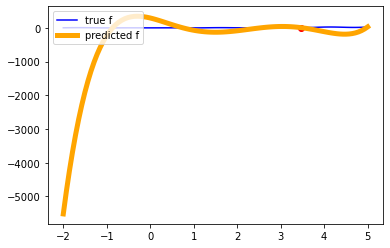

In [87]:
# проба пера
from IPython.display import clear_output

f_true = lambda x: 2*x*np.sin(5*x) + x**2 - 1 

# the plot of f_true:
x_grid = np.linspace(-2,5,100) # 100 linearly spaced numbers
x_grid_enl = np.hstack((x_grid.reshape((100,1))**j for j in range(6)))
y_grid = f_true(x_grid)

X = []
y = []

for i in range(200):

    x_new = np.random.uniform(-2, 5)
    y_new = f_true(x_new) + 2*np.random.randn()
    
    X.append([x_new**j for j in range(6)])
    y.append(y_new)
    
    if len(X) > 5:
        X.pop(0)
        y.pop(0)
        
    # fit a polynomial of degree 5 to the data
    coeffs = np.linalg.lstsq(X, y, rcond=None)[0]
    
    # evaluate the predicted polynomial on the grid
    y_pred = np.dot(x_grid_enl, coeffs)
    
    if (i+1)%5==0:
        clear_output(True)
        plt.plot(x_grid,y_grid, color='blue', label='true f')
        plt.scatter(x_new, y_new, color='red')
        
        plt.plot(x_grid, y_pred, color='orange', linewidth=5, label='predicted f')
        
        plt.legend(loc='upper left')
        plt.show()

Пояснение для чего делаю pop(0):

Используем pop(0) для удаления первого элемента из списков X и y, если их длина превышает 5. Делаем для того, чтобы сохранить только самые последние 5 точек данных для подбора полинома степени 5.  При удалении самой старой точки данных длина списков всегда составляет 5, гарантируя, что для подгонки полинома используются только самые последние точки данных

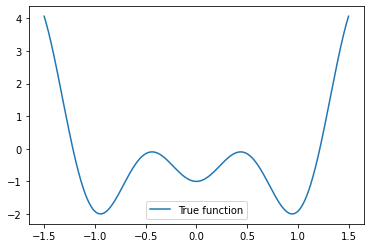

In [84]:
import numpy as np
import matplotlib.pyplot as plt

# Генерация обучающей выборки
np.random.seed(42)
train_x = np.linspace(-1, 1, 50)
train_y = 2 * train_x * np.sin(5 * train_x) + train_x ** 2 - 1 + np.random.normal(0, 0.1, 50)

# Истинная функция
def f_true(x):
    return 2 * x * np.sin(5 * x) + x ** 2 - 1

# График истинной функции
x = np.linspace(-1.5, 1.5, 500)
y = f_true(x)
plt.plot(x, y, label='True function')
plt.legend()
plt.show()

C:\Users\ugans\AppData\Local\Temp\ipykernel_3308\18323223.py:22: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  x_new_vec = np.hstack((np.array(x_new).reshape((1,1))**j for j in range(6)))
C:\Users\ugans\AppData\Local\Temp\ipykernel_3308\18323223.py:27: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  y_pred = lambda x, coef: np.hstack(x.reshape((100,1))**j for j in range(6))@coef


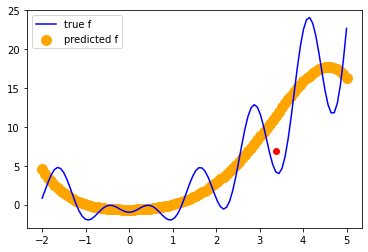

In [83]:
# вот правильный вариант, когда заданная функция неподвижна
from IPython.display import clear_output

f_true = lambda x: 2*x*np.sin(5*x) + x**2 - 1 # this is the true function
# We need this to make the plot of f_true
x_grid = np.linspace(-2,5,100) # 100 linearly spaced numbers
x_grid_enl = np.hstack((x_grid.reshape((100,1))**j for j in range(6)))
y_grid = f_true(x_grid)

for i in range(200):
    x_new = np.random.uniform(-2, 5)
    y_new = f_true(x_new) + 2*np.random.randn()
    
    # the rest of the code is just bells and whistles
    if (i+1)%5==0:
        clear_output(True)
        plt.plot(x_grid,y_grid, color='blue', label='true f')
        plt.scatter(x_new, y_new, color='red')
        
        Matrix1 = x_grid_enl.T@x_grid_enl
        Matrix2 = x_grid_enl.T@np.array([y_grid]).T
        x_new_vec = np.hstack((np.array(x_new).reshape((1,1))**j for j in range(6)))
        Matrix1_new = Matrix1 + x_new_vec@x_new_vec.T
        Matrix2_new = Matrix2 + (x_new_vec*y_new).T
        
        f_pred = np.linalg.inv(Matrix1_new)@Matrix2_new
        y_pred = lambda x, coef: np.hstack(x.reshape((100,1))**j for j in range(6))@coef
        
        plt.scatter(x_grid, y_pred(x_grid, f_pred), color='orange', linewidth=5, label='predicted f')
        plt.legend(loc='upper left')
        plt.ylim(-3,25)
        plt.show()

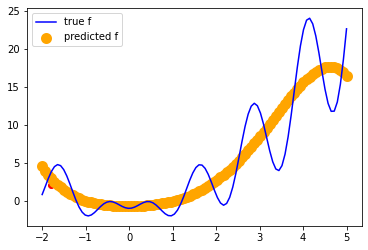

In [90]:
# верный вариант
from IPython.display import clear_output
import numpy as np

f_true = lambda x: 2*x*np.sin(5*x) + x**2 - 1 # this is the true function

# We need this to make the plot of f_true:
x_grid = np.linspace(-2,5,100) # 100 linearly spaced numbers
x_grid_enl = np.hstack((x_grid.reshape((100,1))**j for j in range(6)))
y_grid = f_true(x_grid)


for i in range(200):

    x_new = np.random.uniform(-2, 5)
    y_new = f_true(x_new) + 2*np.random.randn()
    
    x_n = np.vander([x_new], 6)
    x_n = np.flip(x_n)
    k = x_grid_enl.T.dot(x_grid_enl) + x_n.T.dot(x_new)
    kk = ((x_grid_enl.T.dot(y_grid)) + ((x_n.T)*y_new))[0]
    
    if (i+1)%5==0:
        clear_output(True)
        plt.plot(x_grid,y_grid, color='blue', label='true f')
        plt.scatter(x_new, y_new, color='red')
        
        kkk = np.linalg.inv(k).dot(kk)
        
        y_pred = x_grid_enl.dot(kkk.T)
        
        plt.scatter(x_grid, y_pred, color='orange', linewidth=5, label='predicted f')
        
        plt.legend(loc='upper left')
        plt.show()

### Добавление. QR-разложение

**QR-разложением** матрицы $A$ (не обязательно квадратной) мы будем называть её представление в виде $A = QR$, где $Q$ — матрица с ортонормированными столбцами, а $R$ — верхнетреугольная матрица.

Смысл QR-разложения следующий. Пусть $a_1,\ldots,a_m$ — столбцы матрицы $A$, $q_1,\ldots,q_t$ — столбцы матрицы $Q$. Тогда $q_1,\ldots,q_t$ — это ортонормированный базис в подпространстве, являющемся линейной оболочкой векторов $a_1,\ldots,a_m$, а в матрице $R$ записаны коэффициенты, с помощью которых $a_i$ выражаются через $q_1,\ldots,q_t$.

Находить QR-разложение заданной матрицы можно разными способами. Мы познакомим вас не с самым лучшим из них, но по крайней мере с наиболее простым концептуально. Заметим, что ортогональный базис линейной оболочки можно найти с помощью ортогонализации Грама-Шмидта. При этом коэффициенты из матрицы $R$ получаются в качестве побочного продукта этого процесса:

```python
for j = 1...n:
    q_j = a_j
    for i = 1,...,j-1:
        r_ij = (q_i, a_j)
        q_j = q_j - r_ij * q_i
    r_jj = |q_j|
    if r_jj == 0: # a_j in <a_1,...,a_j-1>
        # What would you do in this case?..
    q_j = q_j / r_jj
```

Для нахождения QR-разложения вы можете использовать библиотечную функцию `scipy.linalg.qr`.

Поскольку лабораторная про линейную регрессию, не так-то просто замять вопрос о том, какое же отношение QR-разложение имеет к задаче регрессии. Упомянем одно из возможных применений.

Допустим, мы нашли QR-разложение матрицы $X$, а именно: $X = QR$. Тогда
$$X^TX = (QR)^T(QR) = R^TQ^TQR = R^TR$$

Поскольку в задаче регрессии матрица $X$ обычного полного ранга (то есть её столбцы линейно независимы), матрица $R$ будет квадратной. Благодаря этому нашу обычную формулу для набора регрессионных коэффициентов $\hat{a}$ можно переписать в следующем виде:

$$\hat{a} = (X^TX)^{-1}X^Ty = (R^TR)^{-1}(QR)^Ty = R^{-1}(R^T)^{-1}R^TQ^Ty = R^{-1}Q^Ty$$

Как видите, формула стала проще. Более того, зачастую обращение матрицы $R$ может быть численно более устойчиво, чем обращение матрицы $X^TX$.